In [1]:
# Импорт библиотек
import pandas as pd
import requests
import io
import numpy as np
import datetime
from datetime import timedelta
from pprint import pprint
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Загрузка датафрейма
bond_url='https://iss.moex.com/iss/apps/infogrid/emission/rates.csv?iss.dp=comma&iss.df=%25d.%25m.%25Y&iss.tf=%25H:%25M:%25S&iss.dtf=%25d.%25m.%25Y%25H:%25M:%25S&iss.only=rates&limit=unlimited&lang=ru'
s=requests.get(bond_url).content
df = pd.read_csv(io.StringIO(s.decode('cp1251')), sep=';', header=1)

In [8]:
# Просмотр колонок датафрейма df
df.columns

Index(['SECID', 'SHORTNAME', 'NAME', 'TYPENAME', 'ISIN', 'REGNUMBER',
       'LISTLEVEL', 'FACEVALUE', 'FACEUNIT', 'ISSUESIZE', 'IS_COLLATERAL',
       'IS_EXTERNAL', 'PRIMARY_BOARDID', 'PRIMARY_BOARD_TITLE', 'MATDATE',
       'IS_RII', 'DURATION', 'EVENINGSESSION', 'MORNINGSESSION',
       'IS_QUALIFIED_INVESTORS', 'HIGH_RISK', 'COUPONFREQUENCY', 'YIELDATWAP',
       'COUPONDATE', 'COUPONPERCENT', 'COUPONVALUE', 'COUPONDAYSPASSED',
       'COUPONDAYSREMAIN', 'COUPONLENGTH', 'ISSUEDATE', 'INITIALFACEVALUE',
       'SECSUBTYPE', 'STARTDATEMOEX', 'DAYSTOREDEMPTION', 'OFFERDATE',
       'EMITENTNAME', 'INN', 'LOTSIZE', 'PRICE', 'PRICE_RUB', 'RTL1', 'RTH1',
       'RTL2', 'RTH2', 'RTL3', 'RTH3', 'DISCOUNT1', 'LIMIT1', 'DISCOUNT2',
       'LIMIT2', 'DISCOUNT3', 'DISCOUNTL0', 'DISCOUNTH0', 'FULLCOVERED'],
      dtype='object')

In [3]:
# Выбор нужных столбцов и организация рабочего датафрема df1
df1 = df[['SECID','SHORTNAME','NAME','FACEVALUE','FACEUNIT','DURATION',
          'IS_QUALIFIED_INVESTORS','HIGH_RISK','COUPONFREQUENCY','COUPONDATE',
          'COUPONPERCENT','COUPONVALUE', 'COUPONDAYSPASSED','COUPONLENGTH',
          'OFFERDATE','EMITENTNAME','INN','PRICE','PRICE_RUB', 'ISSUEDATE', 'MATDATE']]

In [4]:
# Анализ df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2646 entries, 0 to 2645
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SECID                   2646 non-null   object 
 1   SHORTNAME               2646 non-null   object 
 2   NAME                    2646 non-null   object 
 3   FACEVALUE               2646 non-null   object 
 4   FACEUNIT                2646 non-null   object 
 5   DURATION                1591 non-null   float64
 6   IS_QUALIFIED_INVESTORS  2646 non-null   int64  
 7   HIGH_RISK               2646 non-null   int64  
 8   COUPONFREQUENCY         2283 non-null   float64
 9   COUPONDATE              2637 non-null   object 
 10  COUPONPERCENT           2486 non-null   object 
 11  COUPONVALUE             2492 non-null   object 
 12  COUPONDAYSPASSED        2607 non-null   float64
 13  COUPONLENGTH            2637 non-null   float64
 14  OFFERDATE               426 non-null    

In [5]:
# Преобразования типа колонки 'COUPONDATE' к типу datetime
df1['COUPONDATE'] = pd.to_datetime(df1['COUPONDATE'].str.strip(), format = '%d.%m.%Y')
df1['MATDATE'] = pd.to_datetime(df1['MATDATE'].str.strip(), format = '%d.%m.%Y')

C:\Users\Олег\AppData\Local\Temp\ipykernel_24064\4001416996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['COUPONDATE'] = pd.to_datetime(df1['COUPONDATE'].str.strip(), format = '%d.%m.%Y')
C:\Users\Олег\AppData\Local\Temp\ipykernel_24064\4001416996.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['MATDATE'] = pd.to_datetime(df1['MATDATE'].str.strip(), format = '%d.%m.%Y')


In [6]:
# Получение сегоднешней даты
#df1.COUPONDATE[df1['COUPONDATE'] <= '2022-10-24']
today = datetime.date.today()

In [381]:
#df1[df1['COUPONDATE'].dt.date > today + timedelta(days=365)].head()

In [9]:
# Создание дополнительного столбца 'COUPONFREQUENCY1' для обработки полей со значением NaN
df1['COUPONFREQUENCY1'] = df1['COUPONFREQUENCY']

C:\Users\Олег\AppData\Local\Temp\ipykernel_24064\4199504680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['COUPONFREQUENCY1'] = df1['COUPONFREQUENCY']


In [10]:
# Просмотр датафрейма
df1.head(2)

,SECID,SHORTNAME,NAME,FACEVALUE,FACEUNIT,DURATION,IS_QUALIFIED_INVESTORS,HIGH_RISK,COUPONFREQUENCY,COUPONDATE,...,COUPONDAYSPASSED,COUPONLENGTH,OFFERDATE,EMITENTNAME,INN,PRICE,PRICE_RUB,ISSUEDATE,MATDATE,COUPONFREQUENCY1
0,AMUNIBB2AER2,UBANK11/22,UNIBANK OJSC Series 1,"100,0",USD,NaN,0,0,4.0,2022-11-15,...,83.0,92.0,NaN,"""UNIBANK"" OPENED JOINT STOCK COMPANY",4902.0,"100,27","6223,79",15.11.2019,2022-11-15,4.0
1,AMUNIBB2DER6,UBANK02/24,UNIBANK OJSC Series 1 21,"100,0",USD,NaN,0,0,4.0,2022-11-05,...,NaN,92.0,NaN,"""UNIBANK"" OPENED JOINT STOCK COMPANY",4902.0,"101,12","6278,38",05.02.2021,2024-02-05,4.0


In [11]:
#количество NaN значений по полю 'COUPONFREQUENCY' - число купонов в год, до преобразования
df1['COUPONFREQUENCY'].isnull().sum()

363

In [386]:
#df1.iloc[8]
#df1[np.isnan(df1['COUPONFREQUENCY'])].index
#df1.iloc[8]['COUPONFREQUENCY']

In [12]:
# Преобразование вручную значений NaN по столбцу число купонов в год 
#df['equal_or_lower_than_4?'] = df['set_of_numbers'].apply(lambda x: 'True' if x <= 4 else 'False')
#df1['COUPONFREQUENCY'] = 365/df1['COUPONLENGTH']
#df1['COUPONFREQUENCY'] = df1['COUPONFREQUENCY1'].apply(lambda x: 365/df1.iloc[x.index]['COUPONLENGTH'] if np.isnan(x) else x)
df1['COUPONFREQUENCY'] = np.where(df1['COUPONFREQUENCY1'].isnull(), 
                                  round(365/df1['COUPONLENGTH']),
                                  df1['COUPONFREQUENCY1'])

C:\Users\Олег\AppData\Local\Temp\ipykernel_24064\3644797796.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['COUPONFREQUENCY'] = np.where(df1['COUPONFREQUENCY1'].isnull(),


In [13]:
# Количество облигаций, где число купонов в год равно 0
df1[df1['COUPONFREQUENCY']==0]['COUPONFREQUENCY'].count()

323

In [14]:
#количество записей со значенией NaN по сталбцу 'COUPONFREQUENCY' - число купонов в год, после преобразования
print('Количество не отработанных COUPONFREQUENCY - число купонов в год -> ' + str(df1['COUPONFREQUENCY'].isnull().sum()))


Количество не отработанных COUPONFREQUENCY - число купонов в год -> 9


In [15]:
# Просмотр записей, в которых число купонов в год равно NaN
df1[df1['COUPONFREQUENCY'].isnull()].head(5)

,SECID,SHORTNAME,NAME,FACEVALUE,FACEUNIT,DURATION,IS_QUALIFIED_INVESTORS,HIGH_RISK,COUPONFREQUENCY,COUPONDATE,...,COUPONDAYSPASSED,COUPONLENGTH,OFFERDATE,EMITENTNAME,INN,PRICE,PRICE_RUB,ISSUEDATE,MATDATE,COUPONFREQUENCY1
1778,RU000A103KG4,Сбер SbD1R,Сбербанк ПАО 001Р-SBERD1,"1000,0",RUB,848.0,0,0,NaN,NaT,...,NaN,NaN,NaN,"Публичное акционерное общество ""Сбербанк России""",7.707084e+09,"81,17","811,7",03.09.2021,2025-02-28,NaN
2345,XS0070553820,EIB-26,European Investment Bank ZCP,"10000,0",USD,NaN,1,0,NaN,NaT,...,NaN,NaN,NaN,European Investment Bank,4.741000e+03,"91,0","564839,73",06.11.1996,2026-11-06,NaN
2387,XS1590566193,BCS 04/27,BCS SP Plc Series 9,"1250,0",USD,NaN,1,0,NaN,NaT,...,NaN,NaN,NaN,BrokerCreditService Structured Products Plc,1.003522e+07,"58,99","45769,09",04.04.2017,2027-04-04,NaN
2402,XS1708325748,BCS GOLD,BCS SP Plc Series 2017-12,"1250,0",USD,NaN,1,0,NaN,NaT,...,NaN,NaN,NaN,BrokerCreditService Structured Products Plc,1.003522e+07,"122,44","94998,59",09.11.2017,2027-10-28,NaN
2406,XS1713519012,BCS MICEX,BCS SP Plc Series 2017-16,"100000,0",RUB,NaN,1,0,NaN,NaT,...,NaN,NaN,NaN,BrokerCreditService Structured Products Plc,1.003522e+07,"128,42","128420,0",28.11.2017,2027-11-09,NaN


In [16]:
df1[(df1['COUPONFREQUENCY'] != df1['COUPONFREQUENCY1']) & (df1['COUPONFREQUENCY1']!=1)][['COUPONFREQUENCY', 'COUPONFREQUENCY1']]

,COUPONFREQUENCY,COUPONFREQUENCY1
8,1.0,NaN
12,0.0,NaN
119,0.0,NaN
178,0.0,NaN
188,0.0,NaN
...,...,...
2419,NaN,NaN
2447,2.0,NaN
2601,NaN,NaN
2602,NaN,NaN


In [17]:
i = 116
print('дней до выплаты ->           ' + str(df1['COUPONDATE'].dt.date.iloc[i] - today))
print('дней до выплаты ->           ' + str(df1['COUPONLENGTH'].iloc[i] - df1['COUPONDAYSPASSED'].iloc[i]))
print('количество дней  в периоде-> ' + str(df1['COUPONLENGTH'].iloc[i]))
print('число купонов в год->        ' + str(df1['COUPONFREQUENCY'].iloc[i]))
print('число купонов в год->        ' + str(365/df1['COUPONLENGTH'].iloc[i]))
print('дата через год ->            ' + str(today + timedelta(days=365)))
print(df1['COUPONDAYSPASSED'].iloc[i])

дней до выплаты ->           43 days, 0:00:00
дней до выплаты ->           43.0
количество дней  в периоде-> 182.0
число купонов в год->        2.0
число купонов в год->        2.0054945054945055
дата через год ->            2023-11-06
139.0


In [18]:
df1.iloc[2]

SECID                                 AT0000A2UF10
SHORTNAME                                Raiff CAG
NAME                      Raiffeisen Centrobank AG
FACEVALUE                                   1000,0
FACEUNIT                                       USD
DURATION                                       NaN
IS_QUALIFIED_INVESTORS                           1
HIGH_RISK                                        0
COUPONFREQUENCY                                4.0
COUPONDATE                     2022-12-21 00:00:00
COUPONPERCENT                                5,000
COUPONVALUE                                   12,6
COUPONDAYSPASSED                              47.0
COUPONLENGTH                                  92.0
OFFERDATE                                      NaN
EMITENTNAME               Raiffeisen Centrobank AG
INN                                         5403.0
PRICE                                        83,45
PRICE_RUB                                  52205,8
ISSUEDATE                      

In [19]:
#Удаление данных, где COUPONFREQUENCY - NaN
df1 = df1[df1['COUPONFREQUENCY'].notna()]

In [20]:
df1

,SECID,SHORTNAME,NAME,FACEVALUE,FACEUNIT,DURATION,IS_QUALIFIED_INVESTORS,HIGH_RISK,COUPONFREQUENCY,COUPONDATE,...,COUPONDAYSPASSED,COUPONLENGTH,OFFERDATE,EMITENTNAME,INN,PRICE,PRICE_RUB,ISSUEDATE,MATDATE,COUPONFREQUENCY1
0,AMUNIBB2AER2,UBANK11/22,UNIBANK OJSC Series 1,"100,0",USD,NaN,0,0,4.0,2022-11-15,...,83.0,92.0,NaN,"""UNIBANK"" OPENED JOINT STOCK COMPANY",4902.0,"100,27","6223,79",15.11.2019,2022-11-15,4.0
1,AMUNIBB2DER6,UBANK02/24,UNIBANK OJSC Series 1 21,"100,0",USD,NaN,0,0,4.0,2022-11-05,...,NaN,92.0,NaN,"""UNIBANK"" OPENED JOINT STOCK COMPANY",4902.0,"101,12","6278,38",05.02.2021,2024-02-05,4.0
2,AT0000A2UF10,Raiff CAG,Raiffeisen Centrobank AG,"1000,0",USD,NaN,1,0,4.0,2022-12-21,...,47.0,92.0,NaN,Raiffeisen Centrobank AG,5403.0,"83,45","52205,8",21.12.2021,2025-01-21,4.0
3,CH0248531110,VTB-24 CHF,VTB CAPITAL S.A. 24 CHF,"5000,0",CHF,NaN,1,0,1.0,2023-10-24,...,13.0,365.0,NaN,VTB Capital S.A,97053.0,"104,71","321569,87",24.07.2014,2024-10-24,1.0
4,CH0379268748,RZD-23 CHF,RZD Capital PLC 23 CHF,"5000,0",CHF,NaN,1,0,1.0,2023-10-02,...,35.0,365.0,NaN,RZD Capital plc,3850.0,"62,0","190764,32",02.10.2017,2023-10-02,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,XS2420560869,BCS01/25,BCS SP Plc Series 239,"100000,0",RUB,NaN,1,0,4.0,2023-01-15,...,22.0,92.0,NaN,BrokerCreditService Structured Products Plc,10035220.0,"100,0","100000,0",15.12.2021,2025-01-15,4.0
2642,XS2423361190,BCS02/27-4,BCS SP Plc Series 240,"1250,0",USD,NaN,1,0,4.0,2022-11-28,...,68.0,90.0,NaN,BrokerCreditService Structured Products Plc,10035220.0,"99,91","77518,05",27.01.2022,2027-02-28,4.0
2643,XS2429208486,BCS05/25,BCS SP Plc Series 243,"1250,0",USD,NaN,1,0,4.0,2022-11-15,...,82.0,91.0,NaN,BrokerCreditService Structured Products Plc,10035220.0,"92,61","71854,13",13.01.2022,2025-05-15,4.0
2644,XS2439218640,BCS06/25-B,BCS SP Plc Series 244,"1250,0",USD,NaN,1,0,4.0,2022-12-02,...,65.0,91.0,NaN,BrokerCreditService Structured Products Plc,10035220.0,"97,55","75686,97",28.01.2022,2025-06-02,4.0


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2637 entries, 0 to 2645
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   SECID                   2637 non-null   object        
 1   SHORTNAME               2637 non-null   object        
 2   NAME                    2637 non-null   object        
 3   FACEVALUE               2637 non-null   object        
 4   FACEUNIT                2637 non-null   object        
 5   DURATION                1590 non-null   float64       
 6   IS_QUALIFIED_INVESTORS  2637 non-null   int64         
 7   HIGH_RISK               2637 non-null   int64         
 8   COUPONFREQUENCY         2637 non-null   float64       
 9   COUPONDATE              2637 non-null   datetime64[ns]
 10  COUPONPERCENT           2486 non-null   object        
 11  COUPONVALUE             2492 non-null   object        
 12  COUPONDAYSPASSED        2607 non-null   float64 

In [22]:
df1.head()

,SECID,SHORTNAME,NAME,FACEVALUE,FACEUNIT,DURATION,IS_QUALIFIED_INVESTORS,HIGH_RISK,COUPONFREQUENCY,COUPONDATE,...,COUPONDAYSPASSED,COUPONLENGTH,OFFERDATE,EMITENTNAME,INN,PRICE,PRICE_RUB,ISSUEDATE,MATDATE,COUPONFREQUENCY1
0,AMUNIBB2AER2,UBANK11/22,UNIBANK OJSC Series 1,"100,0",USD,NaN,0,0,4.0,2022-11-15,...,83.0,92.0,NaN,"""UNIBANK"" OPENED JOINT STOCK COMPANY",4902.0,"100,27","6223,79",15.11.2019,2022-11-15,4.0
1,AMUNIBB2DER6,UBANK02/24,UNIBANK OJSC Series 1 21,"100,0",USD,NaN,0,0,4.0,2022-11-05,...,NaN,92.0,NaN,"""UNIBANK"" OPENED JOINT STOCK COMPANY",4902.0,"101,12","6278,38",05.02.2021,2024-02-05,4.0
2,AT0000A2UF10,Raiff CAG,Raiffeisen Centrobank AG,"1000,0",USD,NaN,1,0,4.0,2022-12-21,...,47.0,92.0,NaN,Raiffeisen Centrobank AG,5403.0,"83,45","52205,8",21.12.2021,2025-01-21,4.0
3,CH0248531110,VTB-24 CHF,VTB CAPITAL S.A. 24 CHF,"5000,0",CHF,NaN,1,0,1.0,2023-10-24,...,13.0,365.0,NaN,VTB Capital S.A,97053.0,"104,71","321569,87",24.07.2014,2024-10-24,1.0
4,CH0379268748,RZD-23 CHF,RZD Capital PLC 23 CHF,"5000,0",CHF,NaN,1,0,1.0,2023-10-02,...,35.0,365.0,NaN,RZD Capital plc,3850.0,"62,0","190764,32",02.10.2017,2023-10-02,1.0


In [23]:
#Преобразование COUPONVALUE и FACEVALUE к типу float
df1['COUPONVALUE'] = df1['COUPONVALUE'].str.replace(',', '.', regex=True).astype('float')
df1['FACEVALUE'] = df1['FACEVALUE'].str.replace(',', '.', regex=True).astype('float')
df1['COUPONPERCENT1'] = df1['COUPONPERCENT']

In [24]:
#Преобразование nan значений в COUPONPERCENT
df1['COUPONPERCENT'] = np.where(df1['COUPONPERCENT1'].isnull(), 
                                df1['COUPONVALUE'] * df1['COUPONFREQUENCY']/df1['FACEVALUE'] * 100,
                                df1['COUPONPERCENT1'])

In [25]:
df1['COUPONPERCENT'].count()

2497

In [26]:
#НКД
df1['NKD'] = df1['COUPONVALUE']*df1['COUPONDAYSPASSED']/df1['COUPONLENGTH']

In [27]:
df1.iloc[3]

SECID                                CH0248531110
SHORTNAME                              VTB-24 CHF
NAME                      VTB CAPITAL S.A. 24 CHF
FACEVALUE                                  5000.0
FACEUNIT                                      CHF
DURATION                                      NaN
IS_QUALIFIED_INVESTORS                          1
HIGH_RISK                                       0
COUPONFREQUENCY                               1.0
COUPONDATE                    2023-10-24 00:00:00
COUPONPERCENT                               4,073
COUPONVALUE                               203.625
COUPONDAYSPASSED                             13.0
COUPONLENGTH                                365.0
OFFERDATE                                     NaN
EMITENTNAME                       VTB Capital S.A
INN                                       97053.0
PRICE                                      104,71
PRICE_RUB                               321569,87
ISSUEDATE                              24.07.2014


In [28]:
#Загрузка данных по стоимости денежных едениц к рублю на сегодня
data = requests.get('https://www.cbr-xml-daily.ru/daily_json.js').json()
pprint(data['Valute']['USD'])
data['Valute'][df1['FACEUNIT'].iloc[0]]['Value']

{'CharCode': 'USD',
 'ID': 'R01235',
 'Name': 'Доллар США',
 'Nominal': 1,
 'NumCode': '840',
 'Previous': 61.6175,
 'Value': 62.0955}


62.0955

In [29]:
#Просмотр используемых денежных едениц
df1['FACEUNIT'].unique()

array(['USD', 'CHF', 'EUR', 'RUB', 'CNY', 'GBP'], dtype=object)

In [30]:
#Проба среза
df1[['FACEUNIT', 'FACEVALUE']]

,FACEUNIT,FACEVALUE
0,USD,100.0
1,USD,100.0
2,USD,1000.0
3,CHF,5000.0
4,CHF,5000.0
...,...,...
2641,RUB,100000.0
2642,USD,1250.0
2643,USD,1250.0
2644,USD,1250.0


In [31]:
#Перевод номинальной стоимости и купонный доход в RUB
df1['FACEVALUE_RUB'] = df1[['FACEUNIT', 'FACEVALUE']].apply(lambda x: x['FACEVALUE'] if x['FACEUNIT'] == 'RUB' else x['FACEVALUE']*data['Valute'][x['FACEUNIT']]['Value'],axis=1)
df1['NKD_RUB'] = df1[['FACEUNIT', 'NKD']].apply(lambda x: x['NKD'] if x['FACEUNIT'] == 'RUB' else x['NKD']*data['Valute'][x['FACEUNIT']]['Value'],axis=1)
df1['COUPONVALUE_RUB'] = df1[['FACEUNIT', 'COUPONVALUE']].apply(lambda x: x['COUPONVALUE'] if x['FACEUNIT'] == 'RUB' else x['COUPONVALUE']*data['Valute'][x['FACEUNIT']]['Value'],axis=1)

In [32]:
df1.iloc[1]

SECID                                             AMUNIBB2DER6
SHORTNAME                                           UBANK02/24
NAME                                  UNIBANK OJSC Series 1 21
FACEVALUE                                                100.0
FACEUNIT                                                   USD
DURATION                                                   NaN
IS_QUALIFIED_INVESTORS                                       0
HIGH_RISK                                                    0
COUPONFREQUENCY                                            4.0
COUPONDATE                                 2022-11-05 00:00:00
COUPONPERCENT                                            5,300
COUPONVALUE                                              1.325
COUPONDAYSPASSED                                           NaN
COUPONLENGTH                                              92.0
OFFERDATE                                                  NaN
EMITENTNAME               "UNIBANK" OPENED JOINT STOCK 

In [33]:
#Преобразование PRICE_RUB к типу float
df1['PRICE_RUB'] = df1['PRICE_RUB'].str.replace(',', '.', regex=True).astype('float')

In [414]:
#df1['PROFIT'] = df1[['FACEVALUE_RUB', 'PRICE_RUB', 'NKD_RUB', 'COUPONVALUE_RUB', 'COUPONFREQUENCY']].apply(lambda x: ((x['FACEVALUE_RUB'] - x['PRICE_RUB'])*1 - x['NKD_RUB'] + 0.87 * x['COUPONFREQUENCY'] * x['COUPONVALUE_RUB'])*100/((x['PRICE_RUB'] + x['NKD_RUB'])*(1+0.06/100+0.0125/100))
#                                                     if (x['FACEVALUE_RUB'] - x['PRICE_RUB']) <= 0 
#                                                     else ((x['FACEVALUE_RUB'] - x['PRICE_RUB'])*0.87 - x['NKD_RUB'] + 0.87 * x['COUPONFREQUENCY'] * x['COUPONVALUE_RUB'])*100/((x['PRICE_RUB'] + x['NKD_RUB'])*(1+0.06/100+0.0125/100)),
#                                                     axis=1)

In [34]:
d3 = df1['MATDATE'].dt.date - today
df1['D1'] = d3

In [35]:
d4=[]
for i4 in range(len(df1['MATDATE'])):
    i3=0
    d3 = df1['D1'].iloc[i4].days - df1['COUPONDAYSPASSED'].iloc[i4]
    while d3 > 0:
        i3+=1
        d3 -= df1['COUPONLENGTH'].iloc[i4]
    d4.append(i3)
#d3 = df2['MATDATE'].dt.date.iloc[6] - today - timedelta(days=r)
#d3 > timedelta(days=24)
df1['D2'] = d4

In [36]:
df1['PROFIT3'] = np.where(df1['MATDATE'].dt.date < today + timedelta(days=365),
                          
                          
                                         100*(0.87 * df1['COUPONVALUE_RUB'] * df1['D2'] - df1['NKD_RUB'])/df1['PRICE_RUB'],
                                        
                                         100*(0.87 * df1['COUPONVALUE_RUB'] * df1['COUPONFREQUENCY'] - df1['NKD_RUB'])/df1['PRICE_RUB'])

In [37]:
df1.describe()

,FACEVALUE,DURATION,IS_QUALIFIED_INVESTORS,HIGH_RISK,COUPONFREQUENCY,COUPONVALUE,COUPONDAYSPASSED,COUPONLENGTH,INN,PRICE_RUB,COUPONFREQUENCY1,NKD,FACEVALUE_RUB,NKD_RUB,COUPONVALUE_RUB,D1,D2,PROFIT3
count,2.637000e+03,1590.000000,2637.000000,2637.000000,2637.000000,2.492000e+03,2607.000000,2637.000000,2.479000e+03,2.452000e+03,2283.000000,2462.000000,2.637000e+03,2462.000000,2.492000e+03,2585,2637.000000,2292.000000
mean,2.463920e+05,740.828931,0.232840,0.052711,2.875616,4.531019e+03,176.238205,377.065605,6.149460e+09,2.029312e+05,3.263250,2586.855518,3.635230e+05,4030.566440,7.477765e+03,1512 days 19:45:25.415860736,11.584755,4.763102
std,5.115173e+06,614.149121,0.422722,0.223499,2.693301,5.384523e+04,287.776122,632.393816,2.897549e+09,1.804054e+06,2.548116,34178.703395,5.213242e+06,37025.611701,5.984529e+04,1879 days 06:05:43.400942208,21.414476,14.065373
min,1.350000e-01,0.000000,0.000000,0.000000,0.000000,1.000000e-05,-23.000000,14.000000,4.550000e+02,4.020000e+00,1.000000,-2.301429,4.030000e+00,-2.301429,1.000000e-05,1 days 00:00:00,0.000000,-40.312293
25%,1.000000e+03,312.250000,0.000000,0.000000,2.000000,8.645000e+00,38.000000,91.000000,5.407159e+09,8.807800e+02,2.000000,1.536049,1.000000e+03,1.941666,9.040000e+00,534 days 00:00:00,1.000000,0.007977
50%,1.000000e+03,624.000000,0.000000,0.000000,2.000000,2.680000e+01,79.000000,182.000000,7.707084e+09,9.990600e+02,2.000000,10.197555,1.000000e+03,12.734831,3.107000e+01,998 days 00:00:00,6.000000,4.008371
75%,1.000000e+03,1007.000000,0.000000,0.000000,4.000000,4.110250e+01,153.000000,183.000000,7.720262e+09,1.042047e+03,4.000000,24.549416,1.000000e+03,32.308184,4.862000e+01,1710 days 00:00:00,12.000000,6.375153
max,1.836381e+08,4948.000000,1.000000,1.000000,26.000000,1.150300e+06,4931.000000,7304.000000,9.909570e+09,6.680433e+07,13.000000,802397.257418,1.836381e+08,802397.257418,1.150300e+06,32197 days 00:00:00,349.000000,404.690583


In [38]:
#разделение на кластеры по купонной доходности
cut_labels_4 = ['> 0', '0 - 5', '5 - 10', '10 - 100', '100 - 500', '< 500']
cut_bins = [-100, 0, 5, 10, 100, 500, 10000]

df1['cut_ex'] = pd.cut(df1['PROFIT3'], bins=cut_bins, labels=cut_labels_4)

In [39]:
cut_ex = df1.groupby('cut_ex', dropna=False).count()['SECID']

In [40]:
cut_ex

cut_ex
> 0          438
0 - 5        934
5 - 10       751
10 - 100     161
100 - 500      8
< 500          0
Name: SECID, dtype: int64

<AxesSubplot:xlabel='cut_ex'>

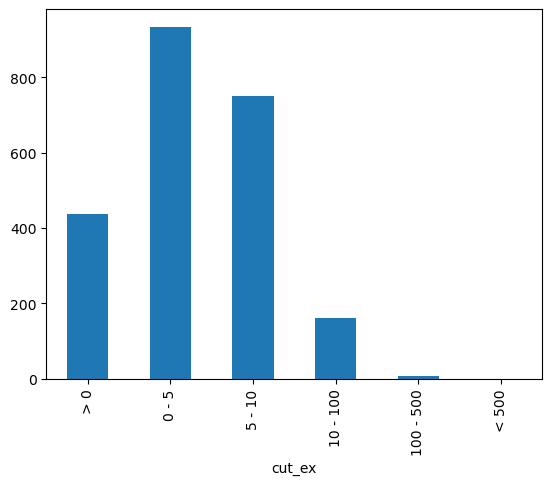

In [41]:
cut_ex.plot(kind='bar')

In [43]:
df1[df1['cut_ex'].isnull() & df1['PROFIT3'].notnull()]

,SECID,SHORTNAME,NAME,FACEVALUE,FACEUNIT,DURATION,IS_QUALIFIED_INVESTORS,HIGH_RISK,COUPONFREQUENCY,COUPONDATE,...,COUPONFREQUENCY1,COUPONPERCENT1,NKD,FACEVALUE_RUB,NKD_RUB,COUPONVALUE_RUB,D1,D2,PROFIT3,cut_ex


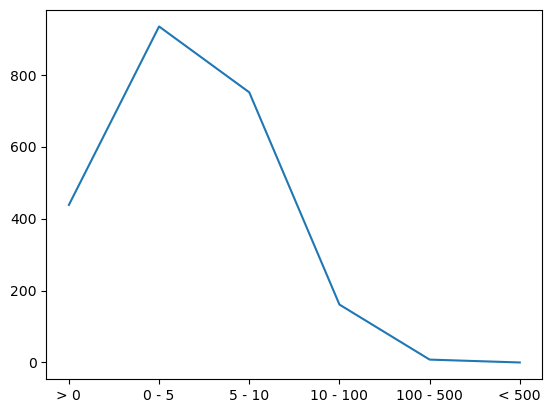

In [44]:
plt.plot(df1.groupby('cut_ex').count()['SECID'])
plt.show()

In [45]:
#2 задание
date2 = df1[(df1['FACEUNIT'] == 'RUB') & (df1['COUPONDAYSPASSED']/df1['COUPONLENGTH'] <= 0.2)]['ISSUEDATE'].unique()
#df1[df1['ISSUEDATE'].isin(date2)].iloc[0]['COUPONDATE'] < today + timedelta(days=365)
df1[df1['ISSUEDATE'].isin(date2)]['MATDATE'].dt.date < today + timedelta(days=365)
#df1[df1['COUPONDATE'].dt.date > today + timedelta(days=365)].head()
#df1[df1['ISSUEDATE'].isin(date2)].iloc[0]['COUPONDATE']

4        True
5        True
21      False
22      False
28       True
        ...  
2633    False
2635    False
2638    False
2642    False
2644    False
Name: MATDATE, Length: 860, dtype: bool

In [46]:
df2 = df1[df1['ISSUEDATE'].isin(date2)]

In [47]:
#df1[df1['MATDATE'].iloc[4].dt.date < today + timedelta(days=365)]
#df2.iloc[4]
#df2['MATDATE'].dt.date.iloc[4]
df2.iloc[6]

SECID                                           RU000A0JT593
SHORTNAME                                         ВолгСпорт2
NAME                                  Волга-Спорт АО обл. 02
FACEVALUE                                              329.0
FACEUNIT                                                 RUB
DURATION                                                 NaN
IS_QUALIFIED_INVESTORS                                     0
HIGH_RISK                                                  0
COUPONFREQUENCY                                          1.0
COUPONDATE                               2023-08-31 00:00:00
COUPONPERCENT                                         21,100
COUPONVALUE                                            69.42
COUPONDAYSPASSED                                        67.0
COUPONLENGTH                                           365.0
OFFERDATE                                                NaN
EMITENTNAME               Акционерное общество "Волга-Спорт"
INN                     

In [627]:
#d3 = df2['MATDATE'].dt.date - today
#df2['D1'] = d3

In [628]:
#d4=[]
#for i4 in range(len(df2['MATDATE'])):
#    i3=0
#    d3 = df2['D1'].iloc[i4].days - df2['COUPONDAYSPASSED'].iloc[i4]
#    while d3 > 0:
#        i3+=1
#        d3 -= df2['COUPONLENGTH'].iloc[i4]
#    d4.append(i3)
#d3 = df2['MATDATE'].dt.date.iloc[6] - today - timedelta(days=r)
#d3 > timedelta(days=24)
#df2['D2'] = d4

In [48]:
#np.where(df1['COUPONPERCENT1'].isnull(), 
#                                df1['COUPONVALUE'] * df1['COUPONFREQUENCY']/df1['FACEVALUE'] * 100,
#                                df1['COUPONPERCENT1'])

#df1['PROFIT'] = df1[['FACEVALUE_RUB', 'PRICE_RUB', 'NKD_RUB', 'COUPONVALUE_RUB', 'COUPONFREQUENCY']].apply(lambda x: ((x['FACEVALUE_RUB'] - x['PRICE_RUB'])*1 - x['NKD_RUB'] + 0.87 * x['COUPONFREQUENCY'] * x['COUPONVALUE_RUB'])*100/((x['PRICE_RUB'] + x['NKD_RUB'])*(1+0.06/100+0.0125/100))
#                                                     if (x['FACEVALUE_RUB'] - x['PRICE_RUB']) <= 0 
#                                                     else ((x['FACEVALUE_RUB'] - x['PRICE_RUB'])*0.87 - x['NKD_RUB'] + 0.87 * x['COUPONFREQUENCY'] * x['COUPONVALUE_RUB'])*100/((x['PRICE_RUB'] + x['NKD_RUB'])*(1+0.06/100+0.0125/100)),
#                                                     axis=1)



df2['PROFIT2'] = np.where(df2['MATDATE'].dt.date < today + timedelta(days=365),
                          
                          
                                np.where((df2['FACEVALUE_RUB'] - df2['PRICE_RUB']) <= 0,
                                         100*(0.87 * df2['COUPONVALUE_RUB'] * df2['D2'] - df2['NKD_RUB'] +(df2['FACEVALUE_RUB'] - df2['PRICE_RUB']))/((df2['PRICE_RUB']+df2['NKD_RUB'])*(1+0.06/100+0.0125/100)),
                                         100*(0.87 * df2['COUPONVALUE_RUB'] * df2['D2'] - df2['NKD_RUB'] + 0.87 * (df2['FACEVALUE_RUB'] - df2['PRICE_RUB']))/((df2['PRICE_RUB']+df2['NKD_RUB'])*(1+0.06/100+0.0125/100))),
                          
                          
                                np.where((df2['FACEVALUE_RUB'] - df2['PRICE_RUB']) <= 0,
                                         100*(0.87 * df2['COUPONVALUE_RUB'] * df2['COUPONFREQUENCY'] - df2['NKD_RUB'] +(df2['FACEVALUE_RUB'] - df2['PRICE_RUB']))/((df2['PRICE_RUB']+df2['NKD_RUB'])*(1+0.06/100+0.0125/100)),
                                        100*(0.87 * df2['COUPONVALUE_RUB'] * df2['COUPONFREQUENCY'] - df2['NKD_RUB'] + 0.87 * (df2['FACEVALUE_RUB'] - df2['PRICE_RUB']))/((df2['PRICE_RUB']+df2['NKD_RUB'])*(1+0.06/100+0.0125/100))))

C:\Users\Олег\AppData\Local\Temp\ipykernel_24064\350818363.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['PROFIT2'] = np.where(df2['MATDATE'].dt.date < today + timedelta(days=365),


In [49]:
df2.iloc[6]

SECID                                           RU000A0JT593
SHORTNAME                                         ВолгСпорт2
NAME                                  Волга-Спорт АО обл. 02
FACEVALUE                                              329.0
FACEUNIT                                                 RUB
DURATION                                                 NaN
IS_QUALIFIED_INVESTORS                                     0
HIGH_RISK                                                  0
COUPONFREQUENCY                                          1.0
COUPONDATE                               2023-08-31 00:00:00
COUPONPERCENT                                         21,100
COUPONVALUE                                            69.42
COUPONDAYSPASSED                                        67.0
COUPONLENGTH                                           365.0
OFFERDATE                                                NaN
EMITENTNAME               Акционерное общество "Волга-Спорт"
INN                     

In [56]:
print('min -> ',df2['PROFIT2'].min())
print('mean -> ',df2['PROFIT2'].mean())
print('max -> ',df2['PROFIT2'].max())

min ->  -43.63653378498678
mean ->  21.878503308694032
max ->  1424.0820025141197


In [57]:
#разделение на кластеры по купонной доходности
cut_labels_4 = ['> 0', '0 - 5', '5 - 10', '10 - 100', '100 - 500', '< 500']
cut_bins = [-100, 0, 5, 10, 100, 500, 10000]

df2['cut_ex2'] = pd.cut(df2['PROFIT2'], bins=cut_bins, labels=cut_labels_4)

C:\Users\Олег\AppData\Local\Temp\ipykernel_24064\2782228988.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cut_ex2'] = pd.cut(df2['PROFIT2'], bins=cut_bins, labels=cut_labels_4)


In [58]:
cut_ex2 = df2.groupby('cut_ex2', dropna=False).count()['SECID']

In [59]:
cut_ex2

cut_ex2
> 0           58
0 - 5        107
5 - 10       207
10 - 100     259
100 - 500      4
< 500          7
Name: SECID, dtype: int64

<AxesSubplot:xlabel='cut_ex2'>

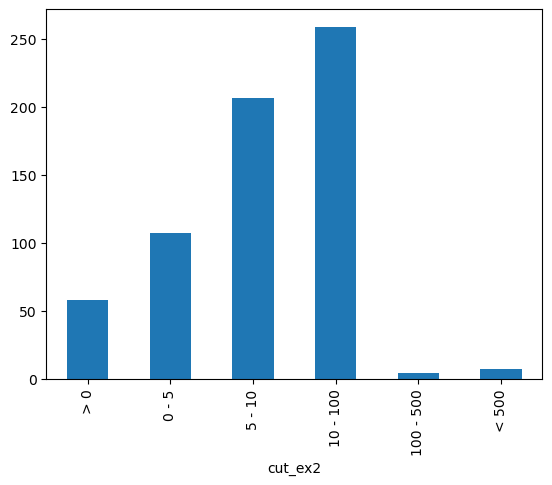

In [60]:
cut_ex2.plot(kind='bar')